In [47]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import scipy

Прожоджим исследовать аргон с параметрами ЛД потенциала из статьи: https://arxiv.org/abs/0904.4629

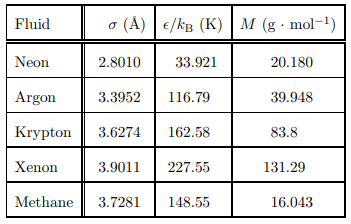

In [48]:
# Ar
k_b = 8.62 * 1e-5   #eV/K
N_a = 6.02214e23
mass = 39.948e-3  #а.е.м.
m_0 = mass / N_a
epsilon = 116.79 * k_b #eV
sigma = 3.3952 #Angtrom

# Task 1

In [49]:
T_range = np.arange(1., 7., 1) * epsilon / k_b
T_art = list(np.arange(1.0, 1.4, 0.1))
T_art += [1.5, 2.1]
T_art += list(np.arange(3., 7., 1))
T_art = np.array(T_art) * epsilon / k_b
T_art


array([116.79 , 128.469, 140.148, 151.827, 175.185, 245.259, 350.37 ,
       467.16 , 583.95 , 700.74 ])

In [50]:
Visc_th = np.array([2.9243, 2.7617, 2.7089, 2.6408,  2.5626, 2.3984, 2.2708, 2.2143, 2.1425,  2.2805])
Visc = np.array([3.56639142641217,1.95480078621607,1.82415882061213,3.7911718211633,1.55431973712962,2.15211013578657])
Diff_msd = np.array([0.0517897088059438,0.123787560861852,0.186194423501043,0.25482789235037,0.320575842291238,0.360811099985016])
Diff_gk = np.array([0.0520300913548735,0.123044986537162,0.188149320509768,0.268424835151408,0.311231330254904,0.377389627686044])

Visc_th = Visc_th * np.sqrt(m_0 * epsilon * 1.6022e-19) / (sigma * 1e-10)**2 * 1e6
Visc = Visc * np.sqrt(m_0 * epsilon * 1.6022e-19) / (sigma * 1e-10)**2 * 1e6

График зависимости коэффициента вязкости от температуры

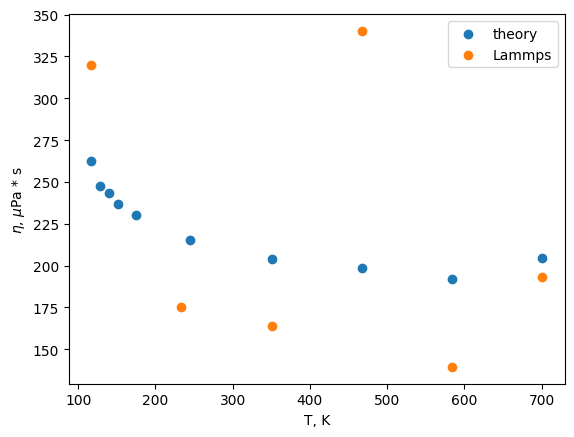

In [51]:
plt.scatter(T_art, Visc_th, label='theory')
plt.scatter(T_range, Visc, label='Lammps')
plt.legend()
plt.xlabel('T, K')
plt.ylabel('$\eta$, $\mu$Pa * s')
plt.show();

Как будто бы корреляция прослеживается, но 1 и 4 точки явно не вписываются в картину

Построим график зависимости диффузии от температуры.

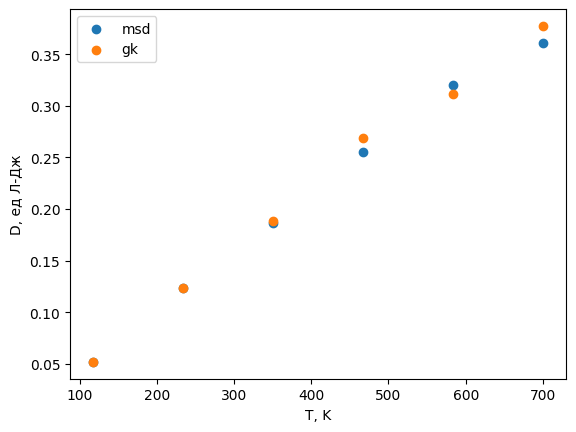

In [52]:
plt.scatter(T_range, Diff_msd, label='msd')
plt.scatter(T_range, Diff_gk, label='gk')
plt.legend()
plt.xlabel('T, K')
plt.ylabel('D, ед Л-Дж')
plt.show();

Значения коэффициента диффузии оказались довольно близки для двух разных методов расчета. Наблюдается линейная зависимость коэф-а диффузии от температуры, что согл-ся с теорией

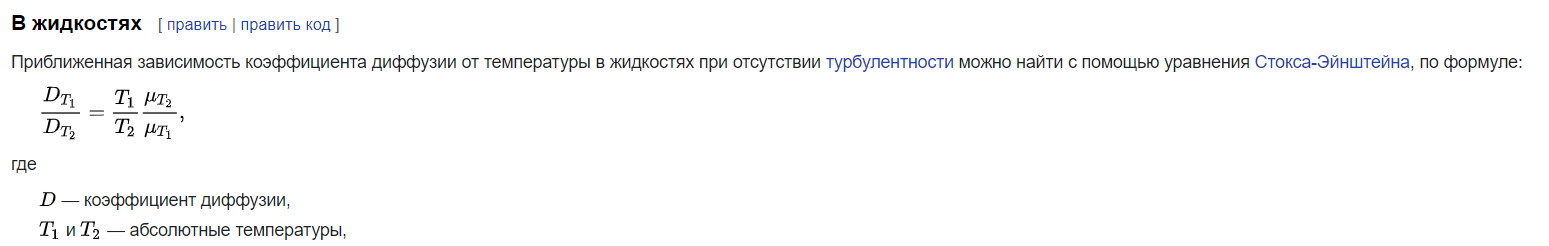

# Task 2

Зафиксировав T = 1.3 ед. Л.Д. для значений плотности из статьи найдем значение коэффициента вязкости с помощью формулы Бачинского

In [53]:
Dens = np.array([0.05, 0.1, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95]) / sigma**3
Visc = np.array([0.130946120129177,0.135080442000703,0.498897629928331,0.914232772339027,1.58651681716615,1.7148018136758,2.10058581543187,5.41101403231278,4.36769804926316]) * np.sqrt(m_0 * epsilon * 1.6022e-19) / (sigma * 1e-10)**2 * 1e6


V_c=1.5171772507887415, c=67.49613304286089


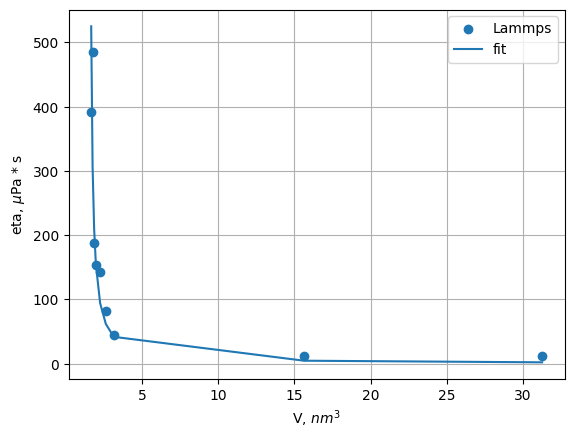

In [68]:
# plt.scatter(Dens, Visc)
plt.show();
x =  mass / Dens
plt.scatter(x, Visc, label='Lammps')
fitted = scipy.optimize.curve_fit(lambda t, V_c, c: (t - V_c) / c,  x[-4:],  1 / Visc[-4:], bounds=([0, -np.inf], [np.inf, np.inf]) )
V_c, c = fitted[0]
print(f"V_c={V_c}, c={c}")
y = c / (x - V_c)
disp = (Visc - y)**2
plt.plot(x, y, label='fit')
plt.grid()
plt.xlabel('V, $nm^{3}$')
plt.ylabel('eta, $\mu$Pa * s')
plt.legend()
plt.plot();

Фиттинг довольно близко лег к полученным точкам. Сравним зафиченное значение $V_c$ (собственный объём, занимаемый частицами жидкости) c теоретическим:

In [71]:
print(4 / 3 * 3.1415 * (2**(1/6) * sigma)**3  / 1000)


0.23183920834491425


По порядку значения не совпали, но возможно могло быть хуже

# Task 3

Построим зависимость коэффициентов переноса от корня из температуры 

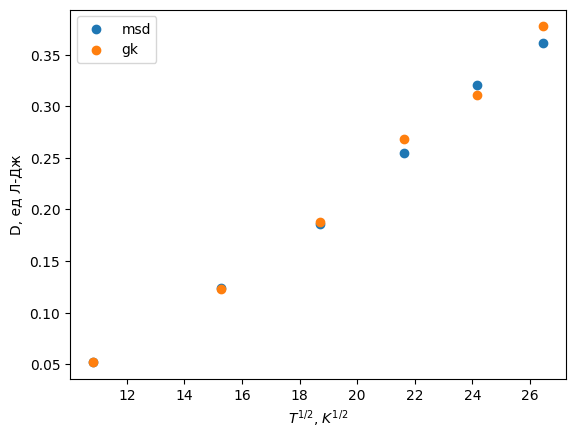

In [44]:
plt.scatter(np.sqrt(T_range), Diff_msd, label='msd')
plt.scatter(np.sqrt(T_range), Diff_gk, label='gk')
plt.xlabel('$T^{1/2}$, $K^{1/2}$')
plt.ylabel('D, ед Л-Дж')
plt.legend()
plt.show();

Вновоь наблюдается сходство двух методов. График остается похожим на лин. зависимость, хотя возможно это из-за масштаба или маленького диапазона данных

# Task 4

Построим зависимость диффузии от обратной вязкости

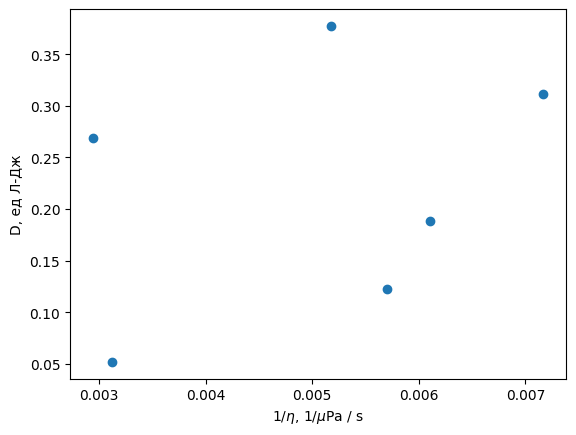

In [46]:
plt.scatter(Visc**(-1), Diff_gk)
plt.xlabel('1/$\eta$, 1/$\mu$Pa / s')
plt.ylabel('D, ед Л-Дж')
plt.show();

Без комментариев

# Вывод

Были рассчитаны коэффициенты диффузии для аргона методами Эйнштейна-Смолуховского и Грина-Кубо. Результаты, полученные двумя методами оказались близки.

Вязкость по порядку совпадает с теоретической и приведенной в статье. Для многих плотностей различие наблюдается лишь в знаках после запятой. Это мб обосновано плохой применимостью формул в этих диапозонах плотностей температур.

Формула Бачинского в целом дает неплохой результат. Значение собственного объёма лишь по поряду сходится с значением, вычисленного при помощи параметров потенциала.

На графике дифузии от обратной вязкости сложно говорить о линейной зависимости  говорить трудно.